In [2]:
import numpy as np
from matplotlib import pyplot as plt
from utils.vector_ops import divergence2D, curl
from utils.vector_fields import E_field

In [3]:
x, y = np.meshgrid(np.linspace(-10, 10, 20),np.linspace(-10, 10, 20))

r2 = x*x + y*y
r = np.sqrt(r2)

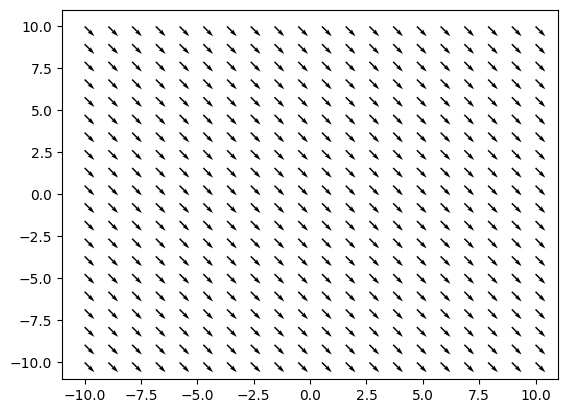

In [4]:
u = 1
v = -1
plt.quiver(x, y, u, v)
plt.show()

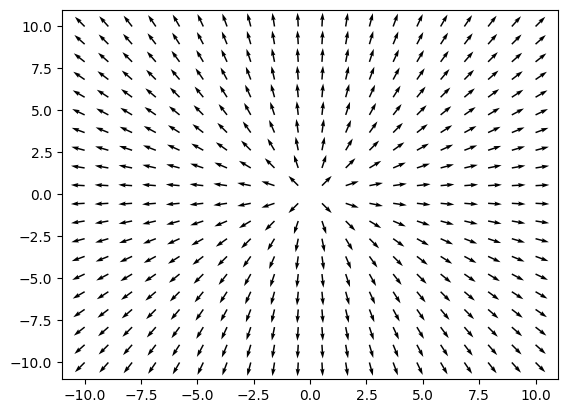

In [5]:
u = x/r
v = y/r
plt.quiver(x, y, u, v)
plt.show()

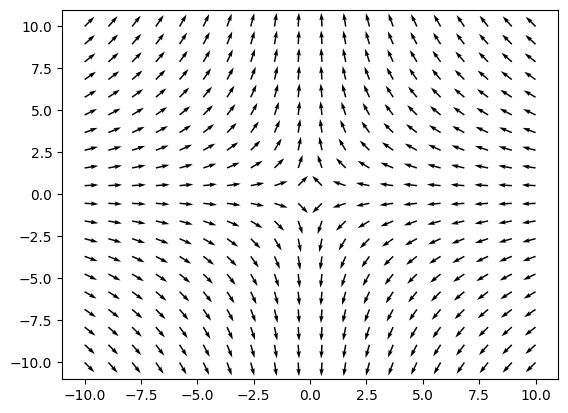

In [6]:
u = -x/r
v = y/r
plt.quiver(x, y, u, v)
plt.show()

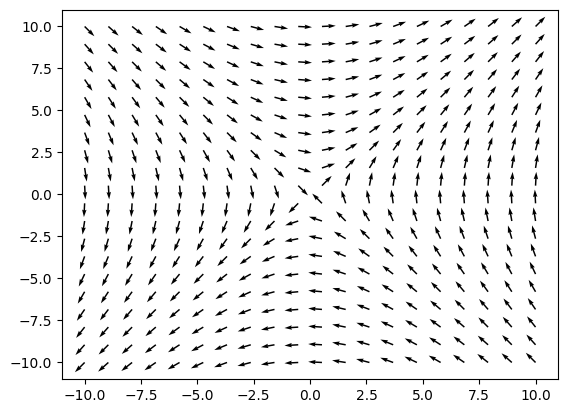

In [7]:
u = y/r
v = x/r
plt.quiver(x, y, u, v)
plt.show()

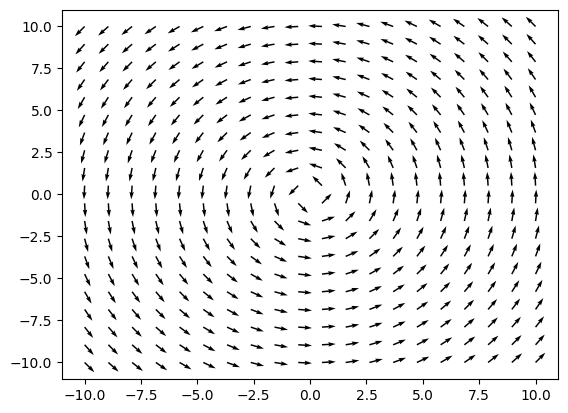

In [8]:
u = -y/r
v = x/r
plt.quiver(x, y, u, v)
plt.show()

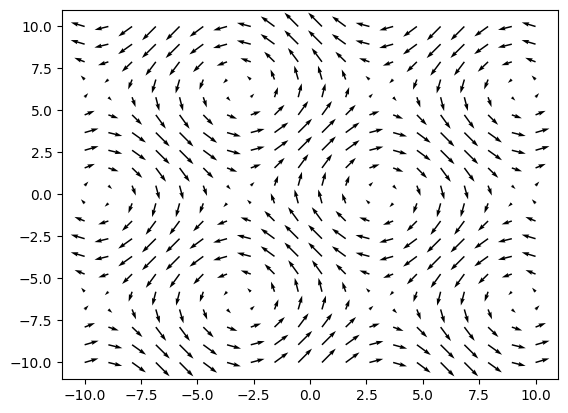

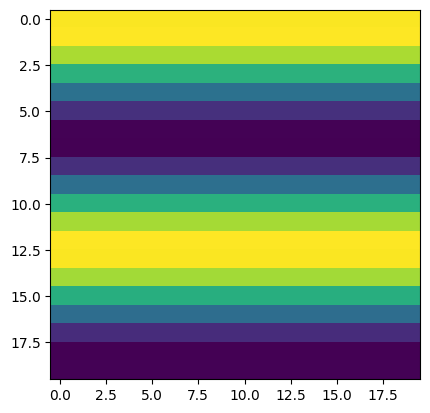

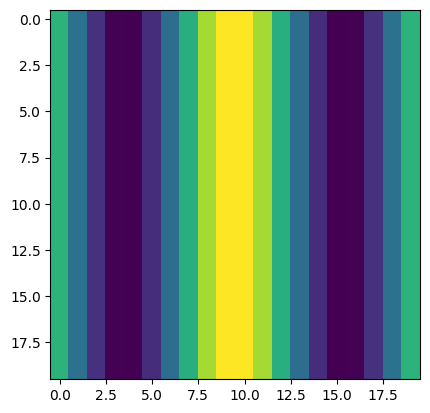

In [9]:
u = np.sin(0.5*y)
v = np.cos(0.5*x)
plt.quiver(x, y, u, v)
plt.show()
plt.imshow(u)
plt.show()
plt.imshow(v)
plt.show()

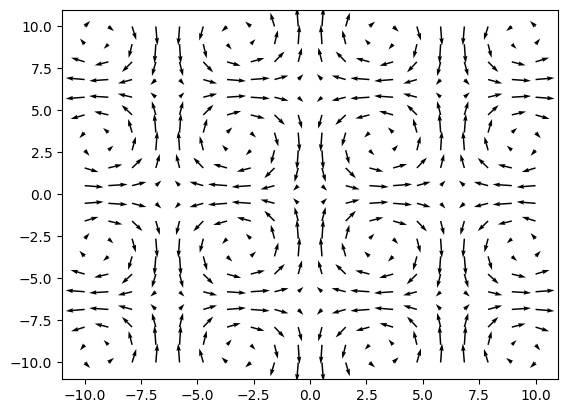

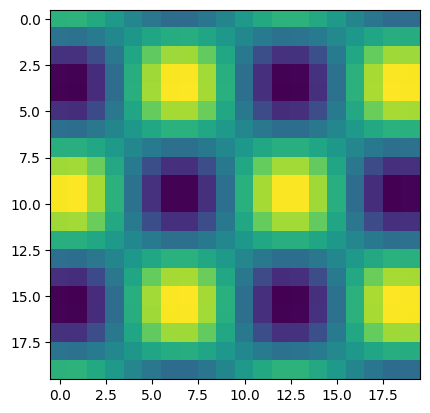

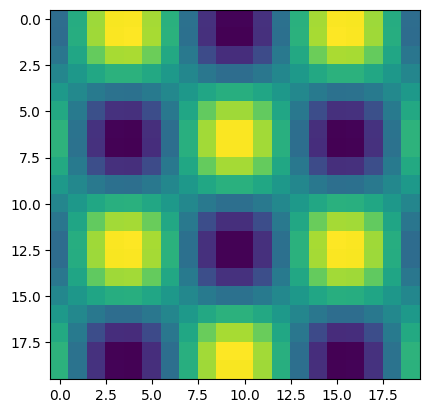

In [10]:
u = np.sin(0.5*x)*np.cos(0.5*y)
v = -np.cos(0.5*x)*np.sin(0.5*y)
plt.quiver(x, y, u, v)
plt.show()
plt.imshow(u)
plt.show()
plt.imshow(v)
plt.show()

### 3D Example

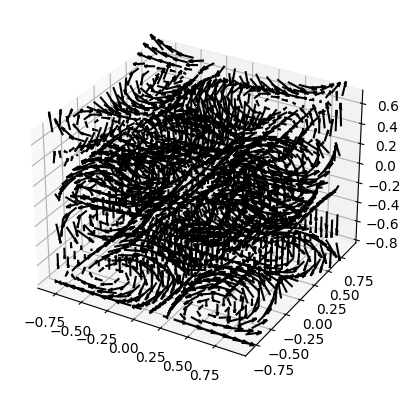

In [11]:
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.1),
                      np.arange(-0.8, 1, 0.1),
                      np.arange(-0.8, 1, 0.3))

u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) * np.sin(np.pi * z))


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.quiver(x, y, z, u, v, w, length=0.3, color='black')
plt.show()

# Divergence

### Showcase

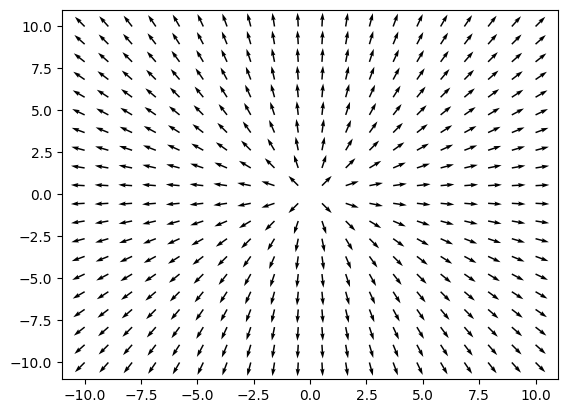

numerical divergence


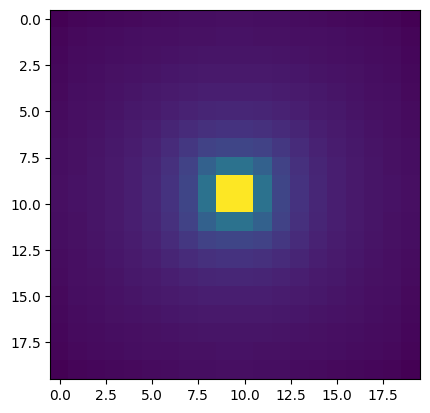

exact divergence


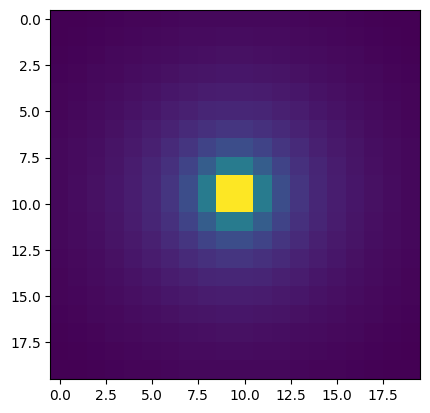

error


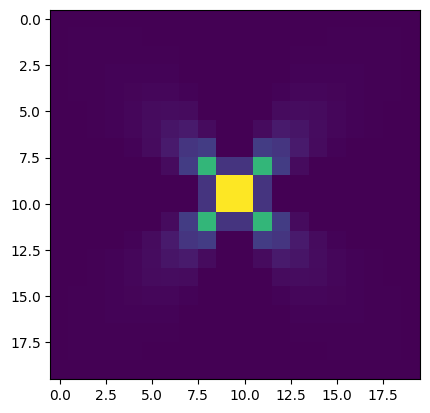

surface plots


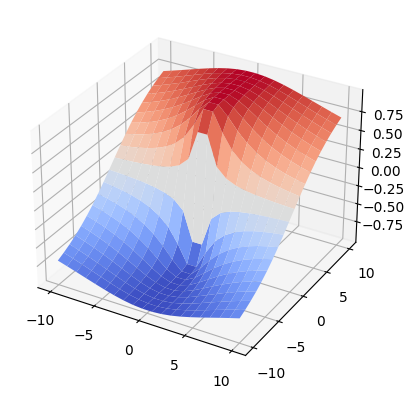

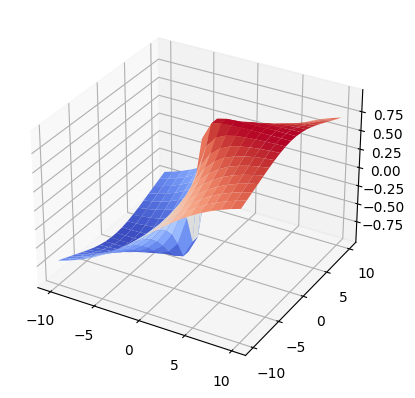

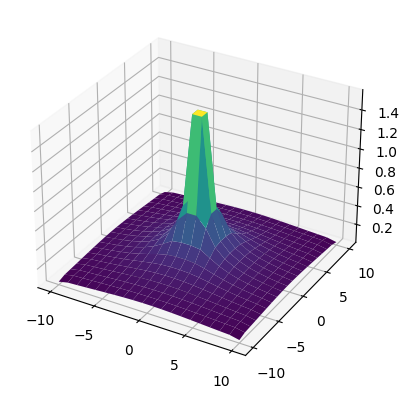

In [12]:
x, y = np.meshgrid(np.linspace(-10, 10, 20),np.linspace(-10, 10, 20))
r2 = x*x +y*y
r = np.sqrt(r2)

u = x/r
v = y/r
plt.quiver(x, y, u, v)
plt.show()

dx = x[0, 1] - x[0, 0]
dy = y[1, 0] - y[0, 0]
df = divergence2D(u, v, dx, dy)

print('numerical divergence')
plt.imshow(df)
plt.show()


dfx_exact = y*y/(r2*r)
dfy_exact = x*x/(r2*r)
df_exact = dfx_exact + dfy_exact

print('exact divergence')
plt.imshow(df_exact)
plt.show()

print('error')
plt.imshow((df - df_exact), vmin=0, vmax=0.1)
plt.show()



print('surface plots')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, v, rstride=1, cstride=1, cmap='coolwarm',
                       linewidth=0, antialiased=True, shade=True)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, u, rstride=1, cstride=1, cmap='coolwarm',
                       linewidth=0, antialiased=True, shade=True)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, df, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0, antialiased=True, shade=True)
plt.show()

# Curl

### Curl example

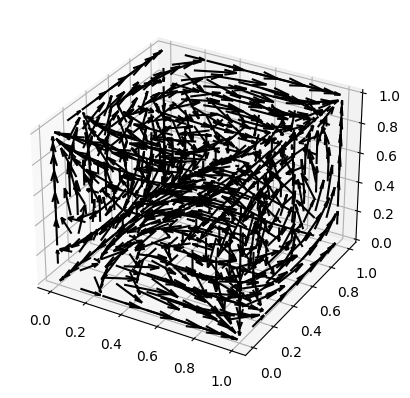

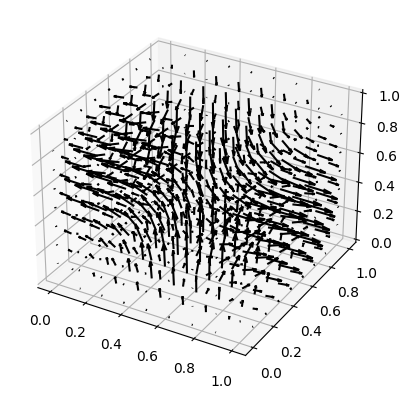

In [13]:
# example 1

x, y, z = np.meshgrid(np.linspace(0, 1, 9),
                      np.linspace(0, 1, 9),
                      np.linspace(0, 1, 9))



u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) * np.sin(np.pi * z)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.quiver(x, y, z, u, v, w, length=0.3, color='black')
plt.show()



dx = x[0, 1, 0] - x[0, 0, 0]
dy = y[1, 0, 0] - y[0, 0, 0]
dz = z[0, 0, 1] - z[0, 0, 0]
cfx, cfy, cfz = curl(u, v, w, dx, dy, dz)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.quiver(x, y, z, cfx, cfy, cfz, length=0.03, color='black')
plt.show()


### Electric field example
Divergence of the electic field of point charges in 2D

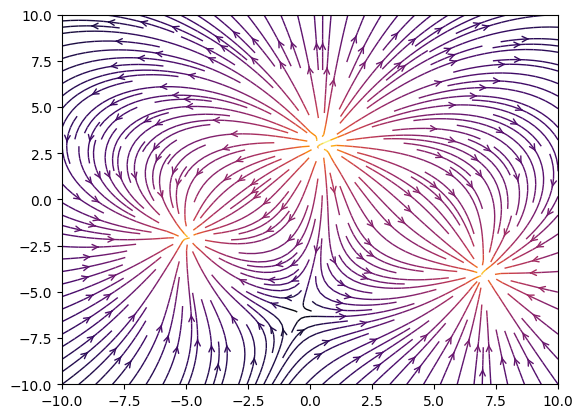

numerical divergence


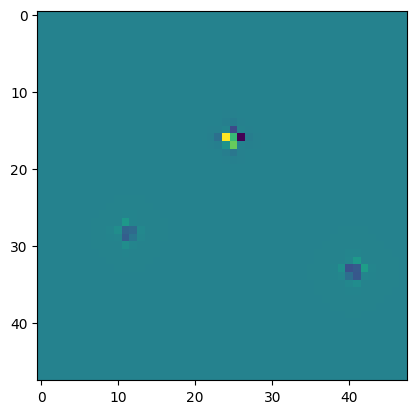

surface plots


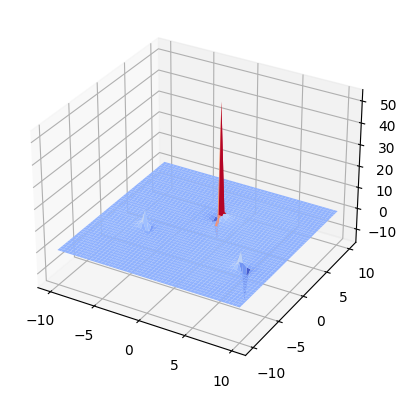

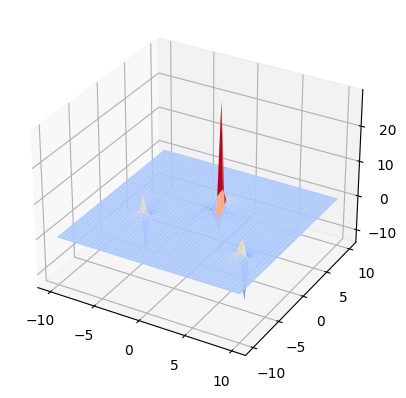

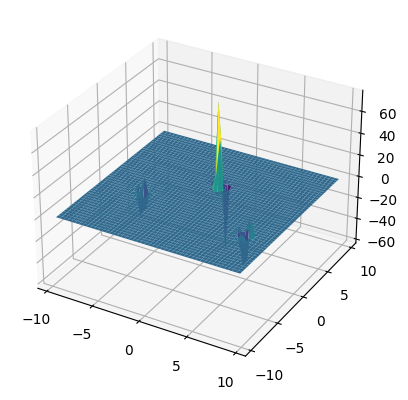

In [14]:
# example 
x, y = np.meshgrid(np.linspace(-10, 10, 50),np.linspace(-10, 10, 50))

E = E_field(1, 0.5, 3, x, y) + E_field(-0.5, -5, -2, x, y) + E_field(-0.7, 7, -4, x, y)
Ex = E[0]
Ey = E[1]
E_m = np.sqrt(Ex*Ex + Ey*Ey)

fig = plt.figure()
ax = fig.add_subplot(111)
color = 2 * np.log(E_m)
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.0)
plt.show()



dx = x[0, 1] - x[0, 0]
dy = y[1, 0] - y[0, 0]
df = divergence2D(Ex, Ey, dx, dy)

df = df[1:-1, 1:-1]



print('numerical divergence')
plt.imshow(df[::-1, :])
plt.show()

print('surface plots')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, Ex, rstride=1, cstride=1, cmap='coolwarm',
                       linewidth=0, antialiased=True, shade=True)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, Ey, rstride=1, cstride=1, cmap='coolwarm',
                       linewidth=0, antialiased=True, shade=True)
plt.show()

x = x[1:-1, 1:-1]
y = y[1:-1, 1:-1]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, df, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0, antialiased=True, shade=True)
plt.show()

Curl of the electic field of point charges in 2D and 3D

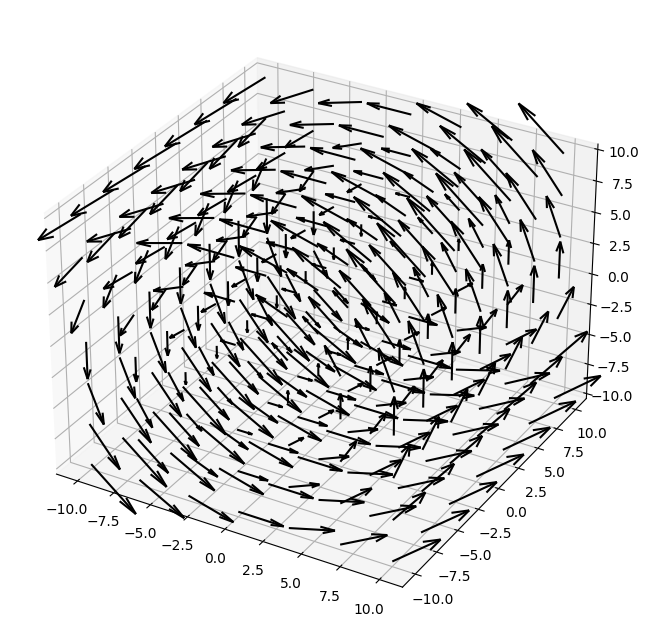

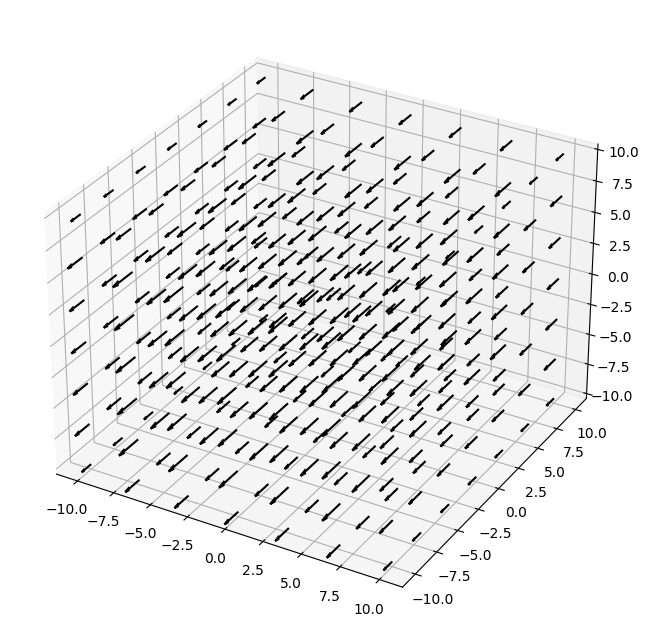

section z=0.0


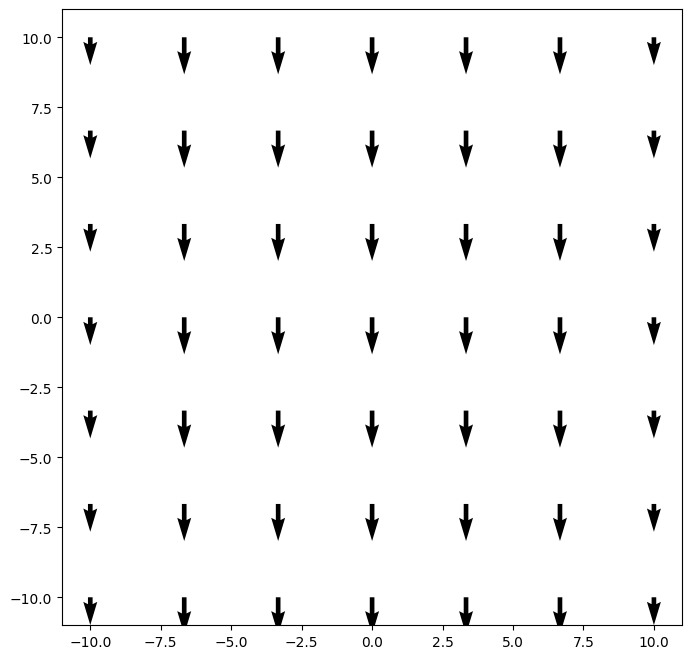

In [15]:
# example 2

x, y, z = np.meshgrid(np.linspace(-10, 10, 7),np.linspace(-10, 10, 7), np.linspace(-10, 10, 7))
rho = np.sqrt(x*x + z*z)

Ex = -np.copy(z)
Ey = np.zeros_like(y)
Ez = np.copy(x)
'''E_m = np.sqrt(Ex*Ex + Ey*Ey + Ez*Ez)
E_m += np.min(E_m)
E_m /= np.max(E_m)'''

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(projection='3d')
ax.quiver(x, y, z, Ex, Ey, Ez, length=0.3, color='black')
plt.show()


dx = x[0, 1, 0] - x[0, 0, 0]
dy = y[1, 0, 0] - y[0, 0, 0]
dz = z[0, 0, 1] - z[0, 0, 0]
cEx, cEy, cEz = curl(Ex, Ey, Ez, dx, dy, dz)
'''
cE_m = np.sqrt(cEx*cEx + cEy*cEy + cEz*cEz)
cE_m += np.min(cE_m)
cE_m /= np.max(cE_m)'''

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(projection='3d')
ax.quiver(x, y, z, cEx, cEy, cEz, length=1.0, color='black')
plt.show()



i = 3
print(f'section z={z[0, 0, i]:.1f}')
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)
ax.quiver(x[..., i], y[..., i], cEx[..., i], cEy[..., i], color='black')
plt.show()


### Divergence Showcase

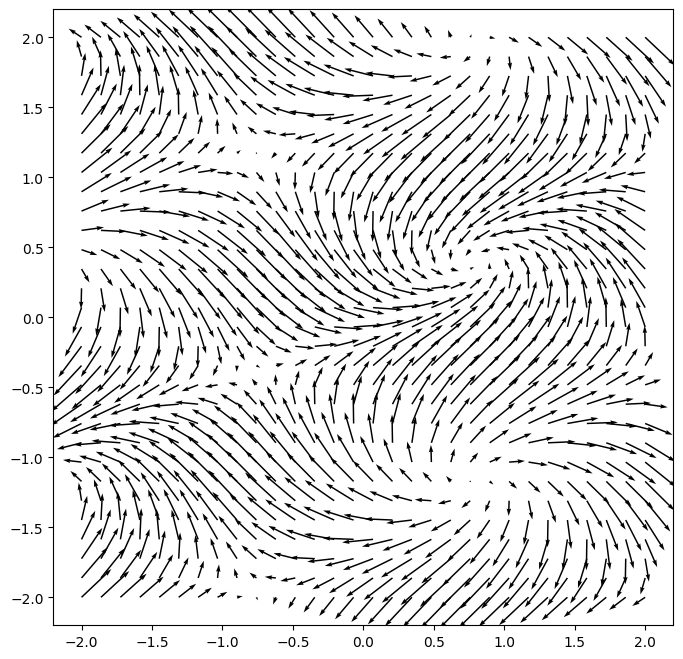

numerical divergence


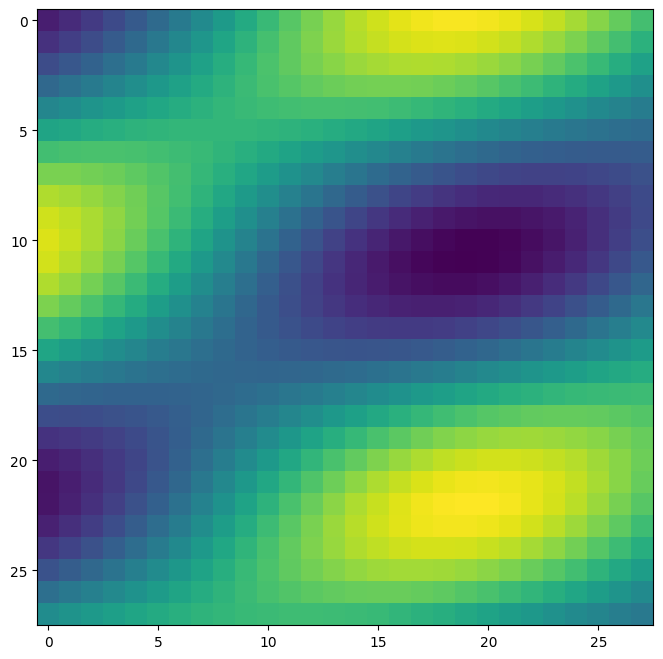

surface plots


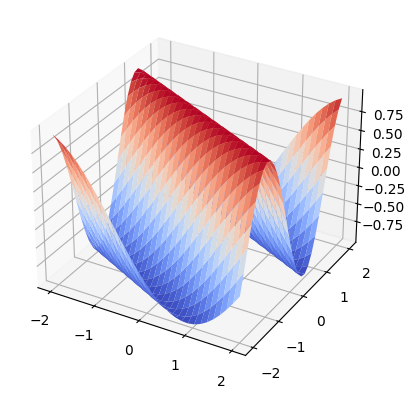

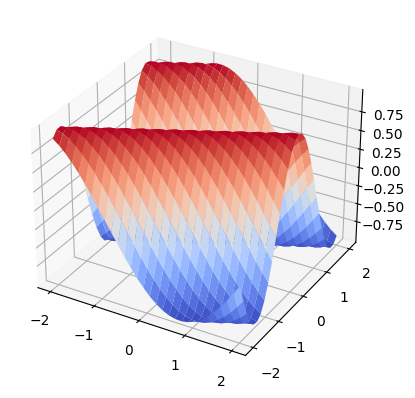

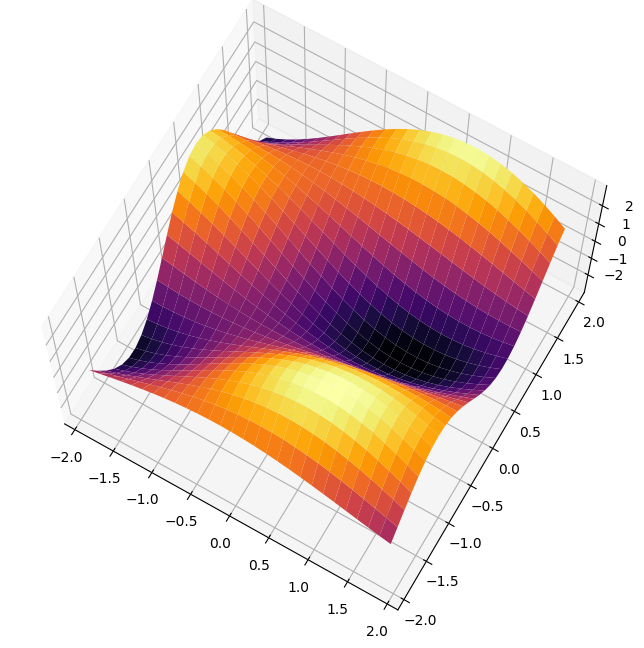

In [16]:
x, y = np.meshgrid(np.linspace(-2, 2, 30), np.linspace(-2, 2, 30))

u = np.cos(x+2*y)
v = np.sin(x-2*y)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()
ax.quiver(x, y, u, v, scale=20)
plt.show()


'''fig = plt.figure()
ax = fig.add_subplot(111)
color = np.sqrt(u*u + v*v)
ax.streamplot(x, y, u, v, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.0)
plt.show()'''



dx = x[0, 1] - x[0, 0]
dy = y[1, 0] - y[0, 0]
df = divergence2D(u, v, dx, dy)

df = df[1:-1, 1:-1]


print('numerical divergence')
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()
ax.imshow(df[::-1, :])
plt.show()

print('surface plots')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, u, rstride=1, cstride=1, cmap='coolwarm',
                       linewidth=0, antialiased=True, shade=True)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, v, rstride=1, cstride=1, cmap='coolwarm',
                       linewidth=0, antialiased=True, shade=True)
plt.show()

x = x[1:-1, 1:-1]
y = y[1:-1, 1:-1]
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, df, rstride=1, cstride=1, cmap='inferno',
                       linewidth=0, antialiased=True, shade=True)
ax.view_init(70, -60)
plt.show()